# Zahlenerkennung

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Daten importieren
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
class_names = [0,1,2,3,4,5,6,7,8,9]

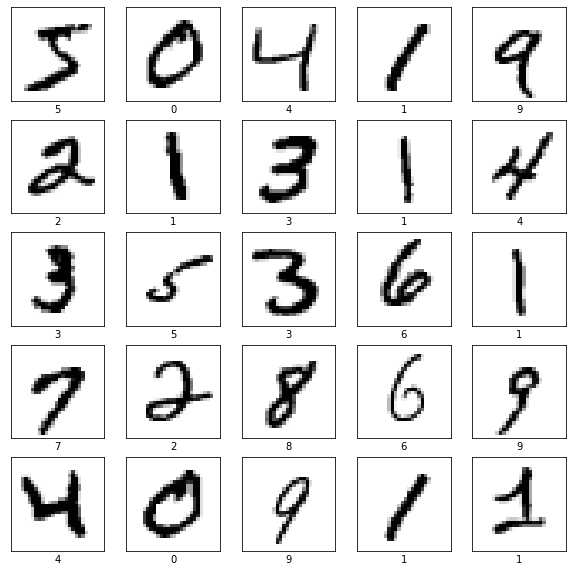

In [4]:
#Anzeigen der ersten paar Bilder
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [5]:
#Model erstellen
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


#Model kompilieren
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Model trainieren
model.fit(x_train, y_train, epochs=5)

#Accuracy testen
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

W0726 10:15:25.331066 139699552843392 deprecation.py:506] From /usr/lib64/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1628: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0726 10:15:25.589635 139699552843392 deprecation.py:323] From /usr/lib64/python3.6/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 2.3040 - acc: 0.8471
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3677 - acc: 0.9078
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2906 - acc: 0.9234
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2576 - acc: 0.9335
Epoch 5/5
10000/10000 [==============================] - 0s 37us/sample - loss: 0.2992 - acc: 0.9350
Test accuracy: 0.935


In [6]:
#Vorhersage machen

predictions = model.predict(x_test)

predictions[0]

array([1.7209525e-24, 2.5758384e-17, 1.7207444e-07, 1.1017016e-09,
       1.1884874e-15, 1.7020551e-05, 5.5458498e-35, 9.9998248e-01,
       6.4903740e-09, 3.8387395e-07], dtype=float32)

In [7]:
#Maximalen Wert finden
np.argmax(predictions[0])

7

In [8]:
#Überprüfen
y_test[0]

7

In [9]:
#Grafen erstellen
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  #plt.xticks([])
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


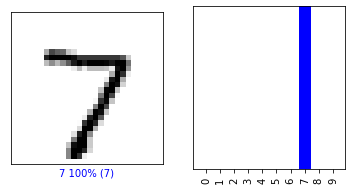

In [10]:
#Erste Zahl betrachten

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

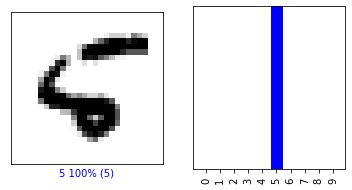

In [11]:
#Andere Zahl betrachten

i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

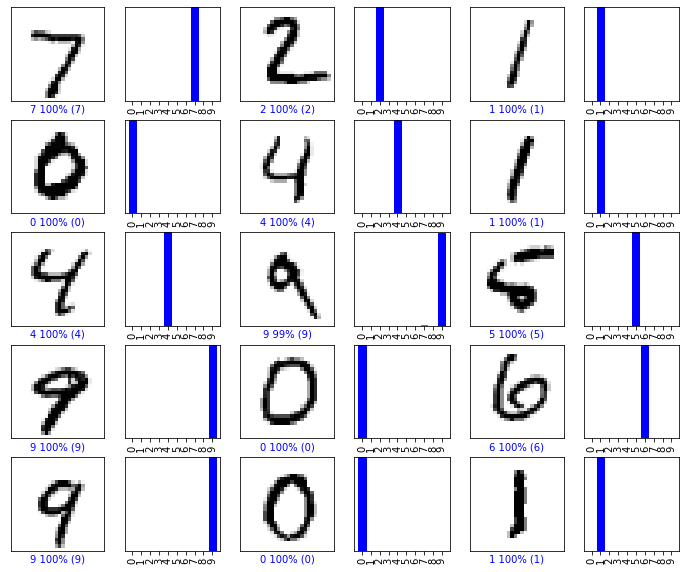

In [12]:
#Anzeigen von mehreren Zahlen

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()


In [13]:
#Vorhersage eines einzelnen Bilds

img = x_test[0]

img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

print(predictions_single)

[[1.7209592e-24 2.5758384e-17 1.7207574e-07 1.1016974e-09 1.1884828e-15
  1.7020551e-05 5.5458922e-35 9.9998248e-01 6.4903496e-09 3.8387105e-07]]


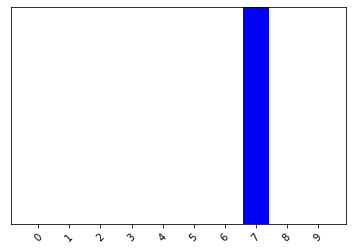

In [14]:
#Grafisch darstellen
plot_value_array(0, predictions_single, y_test)
plt.xticks(range(10), class_names, rotation=45)
plt.show()
